In [1]:

import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [2]:

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kasireddysaisnigdha","key":"1355485bb68ff95a37d9847dd75f5bac"}'}

In [3]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [4]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 98% 561M/572M [00:08<00:00, 86.3MB/s]
100% 572M/572M [00:08<00:00, 72.3MB/s]


In [5]:

!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [6]:
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.


In [7]:

data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [8]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

['person1206_virus_2051.jpeg']
image shape (1024, 1160)


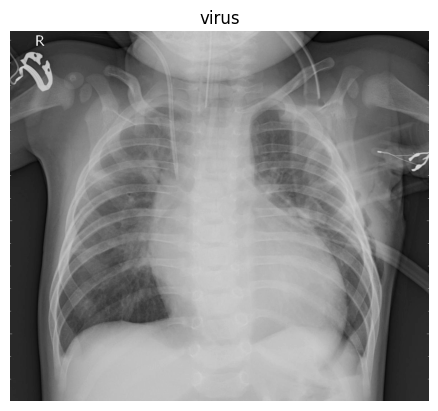

In [9]:
img = view_image("/content/COVID_IEEE/","virus")

['NORMAL2-IM-0915-0001.jpeg']
image shape (1036, 1276)


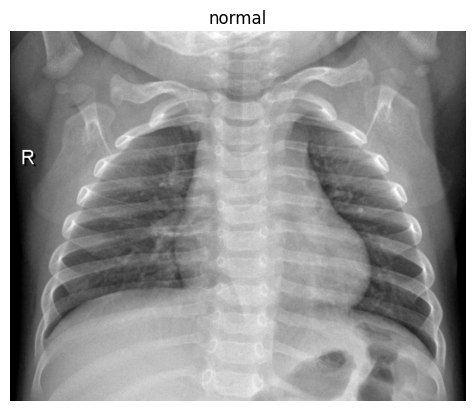

In [10]:

img = view_image("/content/COVID_IEEE/","normal")

['EUNYQzRWsAIhJg2.jfif']
image shape (2012, 2012, 3)


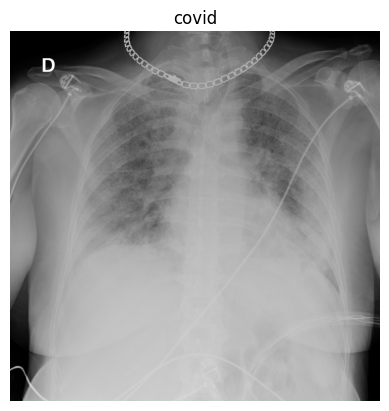

In [12]:

img = view_image("/content/COVID_IEEE/","covid")

In [11]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [13]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [14]:

virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(2)

In [15]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [17]:

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [19]:

model.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size=32)

Epoch 1/5
32/32 [==============================] - 266s 8s/step - loss: 0.8633 - accuracy: 0.6098 - val_loss: 0.4705 - val_accuracy: 0.8470
Epoch 2/5
32/32 [==============================] - 275s 9s/step - loss: 0.4340 - accuracy: 0.8510 - val_loss: 0.2814 - val_accuracy: 0.8973
Epoch 3/5
32/32 [==============================] - 264s 8s/step - loss: 0.2729 - accuracy: 0.9108 - val_loss: 0.2358 - val_accuracy: 0.9224
Epoch 4/5
32/32 [==============================] - 258s 8s/step - loss: 0.2029 - accuracy: 0.9225 - val_loss: 0.3000 - val_accuracy: 0.8927
Epoch 5/5
32/32 [==============================] - 261s 8s/step - loss: 0.1674 - accuracy: 0.9422 - val_loss: 0.2511 - val_accuracy: 0.9018


Text(0.5, 1.0, 'Training-Validation Accuracy')

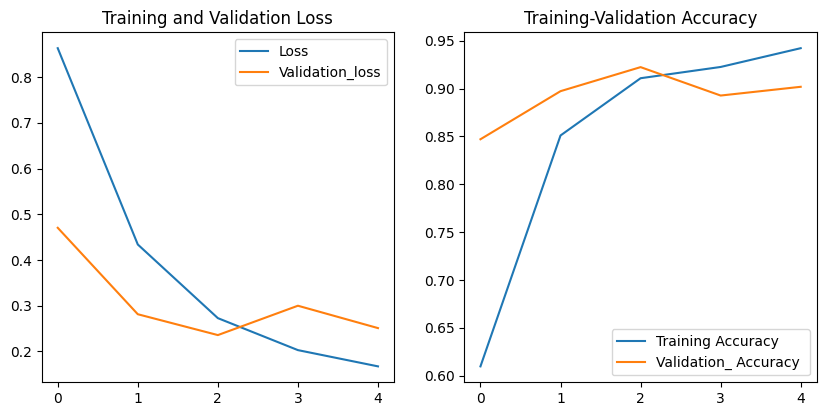

In [20]:
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [21]:

predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 22s 2s/step


In [22]:

print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       108
           1       0.95      0.92      0.94       129
           2       0.90      0.94      0.92       128

    accuracy                           0.93       365
   macro avg       0.93      0.93      0.93       365
weighted avg       0.93      0.93      0.93       365



In [23]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,99,5,4
normal,0,119,10
virus,7,1,120


In [24]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17225924/17225924 [==============================] - 0s 0us/step


In [25]:

model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [26]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [28]:

model.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size=32)

Epoch 1/5
32/32 [==============================] - 65s 2s/step - loss: 6.9554 - accuracy: 0.7824 - val_loss: 3.3928 - val_accuracy: 0.9087
Epoch 2/5
32/32 [==============================] - 53s 2s/step - loss: 0.8503 - accuracy: 0.9559 - val_loss: 1.1565 - val_accuracy: 0.9384
Epoch 3/5
32/32 [==============================] - 67s 2s/step - loss: 0.4093 - accuracy: 0.9696 - val_loss: 0.6095 - val_accuracy: 0.9612
Epoch 4/5
32/32 [==============================] - 54s 2s/step - loss: 0.1116 - accuracy: 0.9863 - val_loss: 0.8668 - val_accuracy: 0.9429
Epoch 5/5
32/32 [==============================] - 54s 2s/step - loss: 0.0389 - accuracy: 0.9951 - val_loss: 0.8955 - val_accuracy: 0.9475


In [34]:
model.save("trained_model.h5")


Text(0.5, 1.0, 'Training-Validation Accuracy')

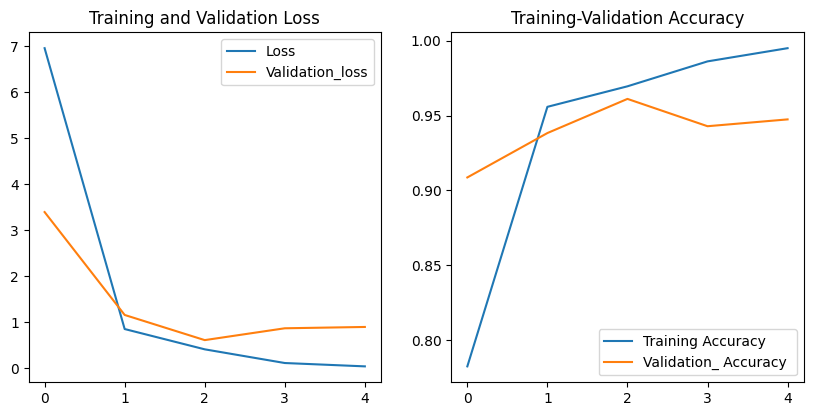

In [29]:

#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [30]:

predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 11s 859ms/step


In [31]:

print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.96      0.85      0.91       129
           2       0.88      0.98      0.93       128

    accuracy                           0.93       365
   macro avg       0.94      0.93      0.93       365
weighted avg       0.93      0.93      0.93       365



In [32]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,105,3,0
normal,2,110,17
virus,2,1,125


In [33]:
!pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB

In [35]:
import gradio as gr

In [36]:
img=gr.inputs.Image(shape=(150,150))
labels=gr.outputs.Label(num_top_classes=1)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [37]:
import gradio as gr
import tensorflow as tf
import cv2
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("/content/trained_model.h5")

# Define the prediction function
def predict_covid(image):
    # Preprocess the image
    img = cv2.resize(image, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # Make predictions
    prediction = model.predict(img)
    labels = ["COVID-19", "Normal", "Viral Pneumonia"]
    class_index = np.argmax(prediction)
    result = labels[class_index]

    return result

# Define the input and output interfaces
image_input = gr.inputs.Image(shape=(224, 224))
label_output = gr.outputs.Label()

# Create the interface
iface = gr.Interface(fn=predict_covid, inputs=image_input, outputs=label_output, title="COVID-19 Chest X-ray Detection")
iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>